In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
path = "gdrive/My Drive/Colab Notebooks"
!ls  "gdrive/My Drive/aoi"
#!tar xvf "gdrive/My Drive/zip123/aoi.tar"
#!cp "gdrive/My Drive/zip123/aoi.zip ./"
#!unzip "gdrive/My Drive/zip123/aoi(csv)"
#!unzip "gdrive/My Drive/zip123/aoi"
#!unzip "gdrive/My Drive/aoi/test_images"
#!unzip "gdrive/My Drive/aoi/train_images"
#!ls  

In [0]:
import tensorflow as tf
import csv
import pandas as pd
import cv2
import pdb
import random as rn
import numpy as np

In [0]:
#read
train=pd.read_csv('gdrive/My Drive/aoi/train.csv')
print(train.shape)

timg=[]
lab=[]

#set train
for i in range(train.shape[0]):
  img = cv2.imread('train_images/'+train['ID'][i],0)
  img = np.resize(img,(256,256,1))/255
  timg.append(img)
  lab.append(train['Label'][i])
  #print("fin:"+str(i)+"/",train.shape[0])
x_array = np.asarray(timg,np.float32)

(2528, 2)


In [0]:
#set test
test=pd.read_csv('gdrive/My Drive/aoi/test.csv')
print(test.shape)
x_test=test['ID']
tstimg=[]
for i in range(len(x_test)):
  img=cv2.imread('test_images/'+x_test[i],0)
  img = np.resize(img,(256,256,1))/255
  tstimg.append(img)
  #print("fin:"+str(i)+"/",x_test.shape[0])
tx_array = np.asarray(tstimg,np.float32)

(10142, 2)


In [0]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import optimizers

Using TensorFlow backend.


In [0]:
model = Sequential()
#mnist 是28x28的灰階圖(28,28,1) = > 28x28=784個輸入
#model.add(Dense(units=256,input_dim=784,kernel_initializer="normal",activation="relu"))
#units=10 : 10個輸出
#model.add(Dense(units=10,kernel_initializer="normal",activation="softmax"))

#print(model.summary())

#model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

#valid  same

model.add(Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last",input_shape=(256,256,1)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

#model.add(Conv2D(filters=32, kernel_size=(2,2),activation="relu",padding="same",data_format="channels_last"))
#model.add(Conv2D(filters=32, kernel_size=(2,2),activation="relu",padding="same",data_format="channels_last"))
#model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(3,3),data_format="channels_last"))
#model.add(Dropout(0.25))

#model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu",padding="valid",data_format="channels_last"))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
#model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(3,3),data_format="channels_last"))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
#model.add(Conv2D(filters=256, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
#model.add(Conv2D(filters=256, kernel_size=(2,2),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))

model.add(Conv2D(filters=512, kernel_size=(3,3),activation="relu",padding="same",data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))
#model.add(Dropout(0.25))

#model.add(Conv2D(filters=2048, kernel_size=(2,2),activation="relu",padding="valid",data_format="channels_last"))
#model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_last"))

model.add(Flatten())
#model.add(Dropout(0.25))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(6,activation="softmax"))

#layer_utils.print_summary(model)
print(model.summary())

W0621 08:42:02.235898 139881383143296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 08:42:02.307271 139881383143296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 08:42:02.332092 139881383143296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 08:42:02.376763 139881383143296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0621 08:42:02.497048 139881383143296 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 42, 42, 128)       73856     
__________

In [0]:
####
y_train_onehot= np_utils.to_categorical(lab)
####z

#print(lab)
#print(y_train_onehot)
adm = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
#model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=adm , metrics=['accuracy'])
train_history = model.fit(x_array,y_train_onehot,validation_split=0.2,epochs=200,batch_size=32,verbose=1)

W0621 08:42:02.569841 139881383143296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0621 08:42:02.579891 139881383143296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0621 08:42:02.720686 139881383143296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2022 samples, validate on 506 samples
Epoch 1/10
2022/2022 [==============================] - 23s 11ms/step - loss: 1.6961 - acc: 0.2626 - val_loss: 1.6645 - val_acc: 0.2510
Epoch 2/10
2022/2022 [==============================] - 10s 5ms/step - loss: 1.6641 - acc: 0.2646 - val_loss: 1.6679 - val_acc: 0.2648
Epoch 3/10
2022/2022 [==============================] - 10s 5ms/step - loss: 1.6623 - acc: 0.2537 - val_loss: 1.6646 - val_acc: 0.2510
Epoch 4/10
2022/2022 [==============================] - 10s 5ms/step - loss: 1.6571 - acc: 0.2557 - val_loss: 1.6646 - val_acc: 0.2510
Epoch 5/10
2022/2022 [==============================] - 10s 5ms/step - loss: 1.6637 - acc: 0.2557 - val_loss: 1.6620 - val_acc: 0.4506
Epoch 6/10
2022/2022 [==============================] - 10s 5ms/step - loss: 1.6493 - acc: 0.2770 - val_loss: 1.6031 - val_acc: 0.4407
Epoch 7/10
2022/2022 [==============================] - 10s 5ms/step - loss: 1.5073 - acc: 0.3828 - val_loss: 1.3064 - val_acc: 0.4901
Epoch 8

In [0]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

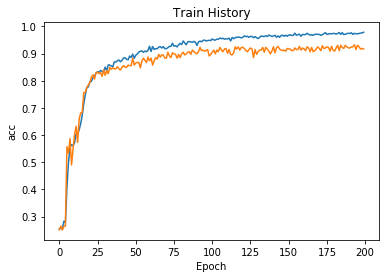

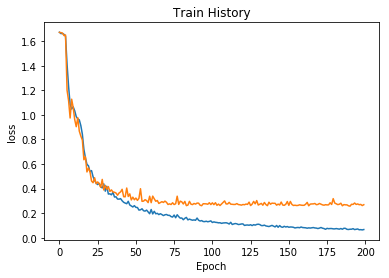

In [0]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history, 'loss', 'val_loss')

In [0]:
loss, accuracy = model.evaluate(x_array,y_train_onehot)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

2528/2528 [==============================] - 4s 1ms/step

Loss: 1.23, Accuracy: 50.91%


In [0]:
#y_test_onehot = np_utils.to_categorical(y_test)
#print(y_test_onehot)
#score = model.evaluate(tx_array)
Y_pred = model.predict(tx_array)
predictions = model.predict_classes(tx_array)

In [0]:
print(x_test)

In [0]:
print(type(Y_pred))
#print(np_utils.to_categorical(Y_pred))
print(predictions.shape)
print(np_utils.to_categorical(predictions))
#print(len(predictions))

dataframe = pd.DataFrame({'ID':x_test,'Label':predictions})
dataframe.to_csv('UPtest.csv',index=0)
#with open('test2.csv','w',newline='') as csvfile:
#  writer = csv.writer(csvfile)
#  writer.writerow['Label']
#  for i in range(len(predictions)):
#    print(predictions[i])
#    writer.writerow(predictions[i])
  

<class 'numpy.ndarray'>
(10142,)
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [0]:
#print(tstlab)
#print(x_array.shape)
#print(tx_array.shape)
#print(tstimg[0].shape)

#print(x_train[0].shape)